In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

params = {
    'legend.fontsize':'medium',
    'figure.figsize':(8,5),
    'axes.labelsize':'large',
    'axes.titlesize':'large',
    'xtick.labelsize':'medium',
    'ytick.labelsize':'medium',
    'lines.markersize':20,
    'lines.linewidth':3
}

pylab.rcParams.update(params)

In [34]:
X_SCALE = 100

In [35]:
# 1차 실험
def get_y(x):
    return np.cos(x/X_SCALE) + 1

In [36]:
def get_direction(error, px, cx):
    x_dir = (((cx-px) > 0)-0.5) * 2
    error_dir = -((error > 0)-0.5)*2
    gradient_dir = x_dir * error_dir
    return gradient_dir * X_SCALE

def get_error(cy, py):
    return cy-py

In [37]:
def set_title(epoch, direction, error, lr):
    title_str = 'epoch : %d\nDirection : %.2f, dError : %.2f, lr : %.2f' %(epoch,
                                                                           direction,
                                                                           error,
                                                                           lr)
    plt.title(title_str)

In [38]:
N=100
x = np.linspace(0, np.pi*2, N) * X_SCALE

y = get_y(x)
p = np.random.randint(0, x.shape[0]-1)

cx = x[p]
cy = y[p]

global global_n
global_n = 0

In [39]:
x

array([  0.        ,   6.34665183,  12.69330365,  19.03995548,
        25.3866073 ,  31.73325913,  38.07991095,  44.42656278,
        50.7732146 ,  57.11986643,  63.46651825,  69.81317008,
        76.15982191,  82.50647373,  88.85312556,  95.19977738,
       101.54642921, 107.89308103, 114.23973286, 120.58638468,
       126.93303651, 133.27968833, 139.62634016, 145.97299198,
       152.31964381, 158.66629564, 165.01294746, 171.35959929,
       177.70625111, 184.05290294, 190.39955476, 196.74620659,
       203.09285841, 209.43951024, 215.78616206, 222.13281389,
       228.47946572, 234.82611754, 241.17276937, 247.51942119,
       253.86607302, 260.21272484, 266.55937667, 272.90602849,
       279.25268032, 285.59933214, 291.94598397, 298.2926358 ,
       304.63928762, 310.98593945, 317.33259127, 323.6792431 ,
       330.02589492, 336.37254675, 342.71919857, 349.0658504 ,
       355.41250222, 361.75915405, 368.10580588, 374.4524577 ,
       380.79910953, 387.14576135, 393.49241318, 399.83

In [40]:
y

array([2.00000000e+00, 1.99798668e+00, 1.99195481e+00, 1.98192870e+00,
       1.96794870e+00, 1.95007112e+00, 1.92836793e+00, 1.90292654e+00,
       1.87384938e+00, 1.84125353e+00, 1.80527026e+00, 1.76604444e+00,
       1.72373404e+00, 1.67850941e+00, 1.63055267e+00, 1.58005691e+00,
       1.52722547e+00, 1.47227107e+00, 1.41541501e+00, 1.35688622e+00,
       1.29692038e+00, 1.23575894e+00, 1.17364818e+00, 1.11083820e+00,
       1.04758192e+00, 9.84134036e-01, 9.20750043e-01, 8.57685162e-01,
       7.95193332e-01, 7.33526186e-01, 6.72932037e-01, 6.13654874e-01,
       5.55933387e-01, 5.00000000e-01, 4.46079936e-01, 3.94390313e-01,
       3.45139266e-01, 2.98525112e-01, 2.54735550e-01, 2.13946905e-01,
       1.76323419e-01, 1.42016587e-01, 1.11164551e-01, 8.38915426e-02,
       6.03073792e-02, 4.05070264e-02, 2.45702131e-02, 1.25611113e-02,
       4.52807743e-03, 5.03457617e-04, 5.03457617e-04, 4.52807743e-03,
       1.25611113e-02, 2.45702131e-02, 4.05070264e-02, 6.03073792e-02,
      

In [41]:
print(cx)
print(cy)

304.63928762082844
0.004528077426915411


In [42]:
# 1차 실험(학습률을 조절하면서 테스트)
learning_rate = 0.1
# learning_rate = 0.5
# learning_rate = 0.2

In [43]:
current_direction = (np.random.rand()-0.5) * 100

nx = cx + current_direction
ny = get_y(nx)

In [44]:
print(nx)
print(ny)

273.90353291424407
0.07993788578425831


<Figure size 800x500 with 0 Axes>

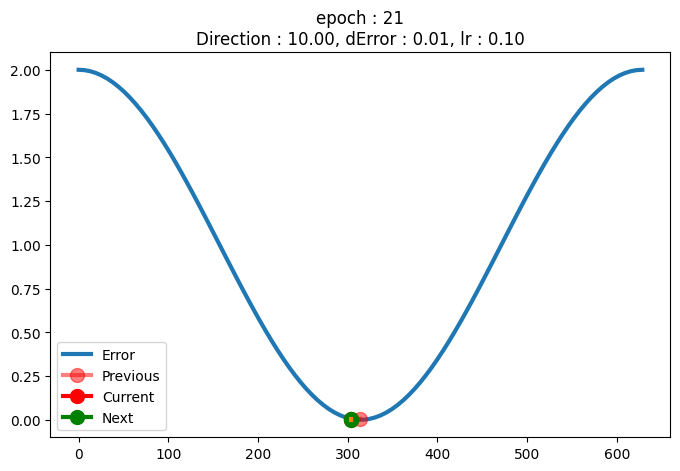

error: [0.0754098083573429, -0.03451551077959991, -0.024977686692057022, -0.015190293815612765, -0.005251124544606189, 0.004740512227058957, -0.004740512227058957, 0.005251124544606189, -0.005251124544606189, 0.004740512227058957, -0.004740512227058957, 0.005251124544606189, -0.005251124544606189, 0.004740512227058957, -0.004740512227058957, 0.005251124544606189, -0.005251124544606189, 0.004740512227058957, -0.004740512227058957, 0.005251124544606189]


In [45]:
from IPython import display
error = []
lr = []
for i in range(20):
    px, py = cx, cy #previous
    cx, cy = nx, ny #current
    d_error = get_error(cy, py)

    error.append(d_error)

    current_direction = get_direction(d_error, px, cx) * learning_rate

    nx = cx + current_direction
    ny = get_y(nx)

    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.plot(x,y)
    plt.plot([px,cx], [cy,ny], 'r.-', alpha=0.5)
    plt.plot(cx, cy, 'r.-')
    plt.plot([cx, cx], [cy,ny], 'g.-')
    plt.plot([cx,cx], [cy, ny])
    set_title((i+2), current_direction, d_error, learning_rate)
    plt.legend(['Error', 'Previous', 'Current', 'Next'])
    plt.show(block=False)
    plt.pause(0.5)

print('error:', error)

